In [3]:
# written in python 3
# Yicheng Li
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import random

In [4]:
df = pd.read_pickle('BTC-USD-60.pkl')

In [120]:
df

,time,low,high,open,close,volume,date
0,1451624340,436.12,436.13,436.12,436.12,6.139053,2016-01-01
1,1451624280,436.02,436.36,436.02,436.13,0.312749,2016-01-01
2,1451624220,436.03,437.12,437.02,436.03,23.060550,2016-01-01
3,1451624160,437.02,437.07,437.02,437.07,1.017000,2016-01-01
4,1451624100,437.02,437.11,437.11,437.02,1.308700,2016-01-01
5,1451624040,437.08,437.12,437.08,437.12,5.810200,2016-01-01
6,1451623980,436.78,437.15,436.78,437.15,25.048400,2016-01-01
7,1451623920,436.36,437.00,436.37,437.00,43.187900,2016-01-01
8,1451623860,435.99,436.45,435.99,436.36,14.718931,2016-01-01
9,1451623800,435.99,435.99,435.99,435.99,2.450000,2016-01-01


In [5]:
df['date'] = pd.to_datetime(df['time'],unit='s').dt.date

In [6]:
group = df.groupby('date')
Daily_Mean_Price = group['close'].mean()

Daily_Mean_Price.head()

date
2016-01-01    433.300405
2016-01-02    435.083883
2016-01-03    431.338427
2016-01-04    433.626442
2016-01-05    433.373114
Name: close, dtype: float64

In [7]:
Daily_Mean_Price=Daily_Mean_Price.reset_index()
Daily_Mean_Price=Daily_Mean_Price.set_index('date')

# Autocorrelation

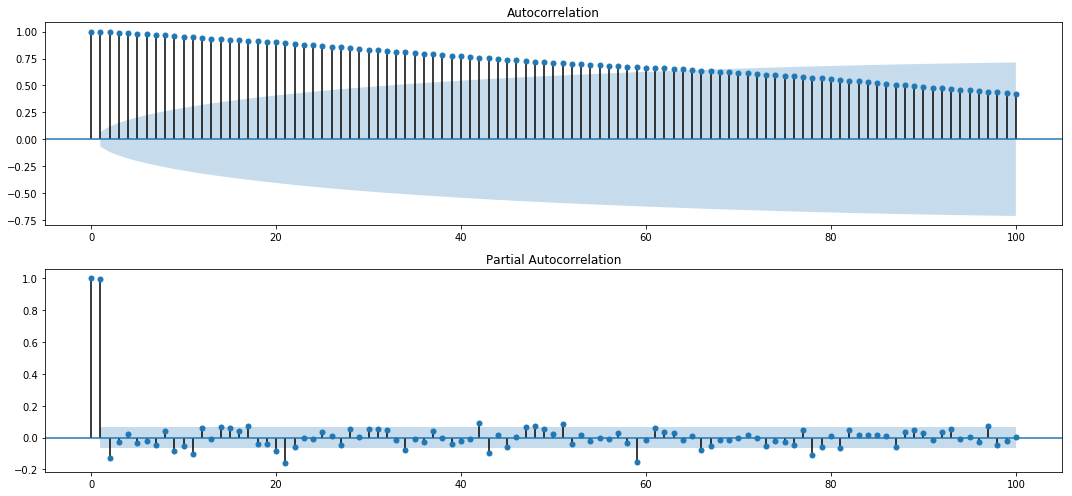

In [33]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(Daily_Mean_Price.close.values.squeeze(), lags=100, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(Daily_Mean_Price.close.values.squeeze(), lags=100, ax=ax)
plt.tight_layout()
plt.show()

# Split training, validation, test sets

In [8]:
from datetime import date
train_start_date = date(2016,1,1)
test_end_date = date(2018,4,3)

In [9]:
total_days = (test_end_date - train_start_date).days + 1
print(total_days)

824


In [10]:
num_days_train, num_days_validate = int(total_days * 0.7), int(total_days * 0.2)
num_days_test = total_days - num_days_train - num_days_validate
print(num_days_train, num_days_validate, num_days_test)

576 164 84


In [11]:
price = np.array(Daily_Mean_Price.values).T
price = price[0]
print(np.shape(price))


(824,)


# Define models

In [12]:
def RMSE(y, y_pred):
    if len(y) != len(y_pred):
        raise ValueError('Length of prediction array is not equal to length of y array.')
    return np.sqrt(sum((y_pred-y)**2)/len(y))

In [13]:
def SMAPE(y, y_pred):
    if len(y) != len(y_pred):
        raise ValueError('Length of prediction array is not equal to length of y array.')
    return np.mean(np.abs(y-y_pred)*2/(np.abs(y)+np.abs(y_pred)))

In [14]:
def normalized_RMSE(y, y_pred):
    if len(y) != len(y_pred):
        raise ValueError('Length of prediction array is not equal to length of y array.')
    return np.sqrt(sum((y_pred/y-1)**2)/len(y))

In [15]:
def RMSE_log_price(y, y_pred):
    if len(y) != len(y_pred):
        raise ValueError('Length of prediction array is not equal to length of y array.')
    return np.sqrt(sum((np.log(y_pred)-np.log(y))**2)/len(y))

In [51]:
# fixed-window linear regression
def train_with_window_size(window_size, loss_func='normalized_RMSE', verbose=True):
    if loss_func != 'normalized_RMSE' and loss_func != 'RMSE_log_price':
        raise ValueError('loss_func must be either normalized_RMSE or RMSE_log_price')
    y = price[window_size:num_days_train]
    W = (np.random.rand(window_size) + np.ones(window_size))/window_size # initialize as weighted average
    W_old = np.ones(window_size)
    b = 0
    if loss_func=='RMSE_log_price':
        learning_rate = 1e-3
    else:
        learning_rate = 1e-7
    error_list = []

    timestep_random_perm = [x for x in range(num_days_train - window_size)]
    timestep_random_perm = random.sample(timestep_random_perm, len(timestep_random_perm))
    iteration = 0
    batch_len = 0
    gradient = 0
    while iteration < 25000 and np.abs(W_old.dot(W_old.T) - W.dot(W.T))/(W_old.dot(W_old.T)) > 0.00001:
        for timestep in timestep_random_perm:
            iteration += 1
    #         print('iteration ',iteration)
            X = price[timestep:timestep+window_size]
            if batch_len == 10:
                batch_len = 1
                W_old = W
                W = W - learning_rate * gradient * X
                b = b - learning_rate * gradient
                if loss_func == 'normalized_RMSE':
                    gradient = (W.dot(X.T) + b)*1.0/price[timestep+window_size] - 1
                else:
                    gradient = (np.log(W.dot(X.T)+b) - np.log(price[timestep+window_size]))/(W.dot(X.T)+b)
    #             print(gradient, W, b)
            else:
                batch_len += 1
                if loss_func == 'normalized_RMSE':
                    gradient += (W.dot(X.T) + b)*1.0/price[timestep+window_size] - 1
                else:
                    gradient += (np.log(W.dot(X.T)+b) - np.log(price[timestep+window_size]))/(W.dot(X.T)+b)

            if iteration % 20 == 0:
                y_pred = []
                for t in range(num_days_train - window_size):
                    X = price[t:t+window_size]
                    y_pred.append(W.dot(X.T) + b)
                if loss_func == 'normalized_RMSE':
                    error = normalized_RMSE(y, y_pred)
                else:
                    error = RMSE_log_price(y, y_pred)
                error_list.append(error)
    
    if verbose:
        plt.figure()
        plt.plot([x*20 for x in range(len(error_list))], error_list)
        plt.title('learining curve')
        plt.ylabel('training loss')
        plt.xlabel('iteration')
        print('Training loss:',error_list[-1])
        y_pred = []
        for t in range(num_days_train - window_size):
            X = price[t:t+window_size]
            y_pred.append(W.dot(X.T) + b)
        print('Training SMAPE:',SMAPE(y, y_pred))

        print(W.dot(W.T))
        print(sum(W)) # should be close to 1 because it's essentially weighted average
        print('W=',W)
        print('b=',b)
    return W, b


In [17]:
# validate
def validate_with_window_size(window_size, W, b, verbose=True):
    y = price[num_days_train:num_days_train+num_days_validate]
    y_pred = []

    for timestep in range(num_days_train-window_size,num_days_train+num_days_validate-window_size):
        X = price[timestep:timestep+window_size]
        y_pred.append(W.dot(X.T) + b)

    validation_SMAPE = SMAPE(y, y_pred)
    if verbose:
        print('Validation SMAPE:', validation_SMAPE)
    
    return validation_SMAPE


Training loss: 0.0348168100214805
Training SMAPE: 0.021721637810518904
0.5158157403497421
1.006239741634516
W= [0.57224487 0.43399487]
b= -0.00010415289139531935
Validation SMAPE: 0.0433509136757599


0.0433509136757599

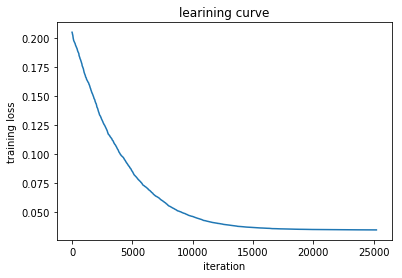

In [52]:
W, b = train_with_window_size(window_size=2, loss_func='normalized_RMSE')
validate_with_window_size(window_size=2, W=W, b=b)

Training loss: 0.032824754705596364
Training SMAPE: 0.02067163943607135
0.5036105199389191
1.0032312291316559
W= [0.48793953 0.5152917 ]
b= -0.0004585177481524183
Validation SMAPE: 0.041938704237772496


0.041938704237772496

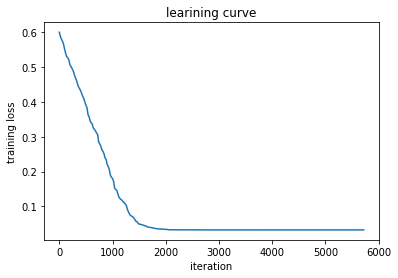

In [53]:
W, b = train_with_window_size(window_size=2, loss_func='RMSE_log_price')
validate_with_window_size(window_size=2, W=W, b=b)

Training loss: 0.09109590099600588
Training SMAPE: 0.08243132273152551
1.1864615108818877
1.089248140178301
W= [1.08924814]
b= -0.0008857901355481351
Validation SMAPE: 0.07733451969795739


0.07733451969795739

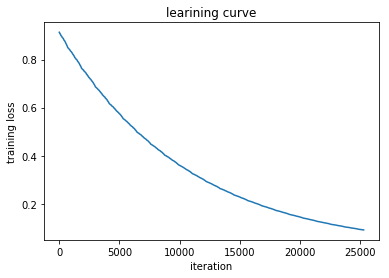

In [73]:
W, b = train_with_window_size(window_size=1, loss_func='normalized_RMSE')
validate_with_window_size(window_size=1, W=W, b=b)

Training loss: 0.02707592263722034
Training SMAPE: 0.01733061246172251
1.0114586173541502
1.005712989552263
W= [1.00571299]
b= -0.0002710294487283638
Validation SMAPE: 0.03440016335675927


0.03440016335675927

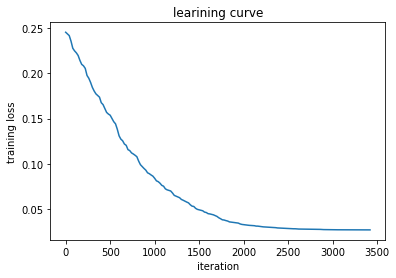

In [72]:
W, b = train_with_window_size(window_size=1, loss_func='RMSE_log_price')
validate_with_window_size(window_size=1, W=W, b=b)

In [64]:
validate_with_window_size(window_size=1, W=np.array([1]), b=0) # Wensi Yin's baseline with window size = 1

Validation SMAPE: 0.035047209389751824


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


Text(0,0.5,'validation SMAPE')

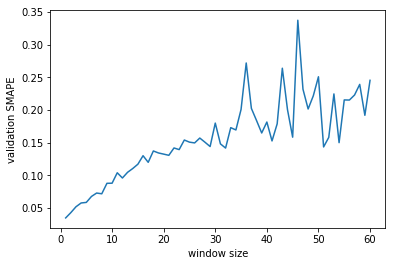

In [50]:
SMAPE_list=[]
for window_size in range(1,61):
    W, b = train_with_window_size(window_size=window_size, loss_func='RMSE_log_price', verbose=False)
    validation_SMAPE = validate_with_window_size(window_size=window_size, W=W, b=b, verbose=False)
    SMAPE_list.append(validation_SMAPE)
    print(window_size)
    
plt.figure()
plt.plot([x+1 for x in range(60)],SMAPE_list)
plt.xlabel('window size')
plt.ylabel('validation SMAPE')